In [57]:
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler

### Подготовка данных

##### Получение данных для анализа

In [61]:
#PATH_DATA = './data/data_part.json'
PATH_DATA = './data/data.json'
PATH_MODEL = './data/model__logistic_regression'


dataRead = []
with open(PATH_DATA, 'r', encoding='utf-8') as jsonfile:    
    dataRead = json.load(jsonfile)
    
data = pd.DataFrame(data=dataRead)
data.head()

,Stylist,Visagiste,Unknown,Skilled,Advertising,Clip,Мale,Fashionshow,Videoshooting,Male,Photographer,Model,TVShow,Female,Photoshooting,Casting,Text
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,мужчин актер съемок клип съемк клип ищ геро му...
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,вниман москв т взлет ориентировочн девушк лет ...
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,х ф данил козловск пада аист мужчин лет рост р...
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,нов шанс попаст кастинг супер телевикторин уга...
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,кастинг июл девушек размер одежд парн работ ию...


##### Получение целевого признака data_y

In [62]:
columns = 'TVShow'
data_y = data[columns]
data_y.value_counts()

0    4787
1     549
Name: TVShow, dtype: int64

##### Получение данных для обучения data_x

In [63]:
data_x = data['Text']
data_x.shape

(5336,)

##### Разделение данных на train_x,train_y и test_x,test_y

In [64]:
TRAIN_PERCENT = 70
delimiter = int(len(data_y) * TRAIN_PERCENT / 100)

train_x = data_x[:delimiter]
test_x = data_x[delimiter:]
train_y = data_y[:delimiter]
test_y = data_y[delimiter:]

### Логистическая регрессия с преобразование текста CountVectorizer

In [69]:
model_vectorizer = CountVectorizer()
vectorizer = model_vectorizer.fit(train_x)
feature_names = model_vectorizer.get_feature_names()

In [70]:
train_x

0       мужчин актер съемок клип съемк клип ищ геро му...
1       вниман москв т взлет ориентировочн девушк лет ...
2       х ф данил козловск пада аист мужчин лет рост р...
3       нов шанс попаст кастинг супер телевикторин уга...
4       кастинг июл девушек размер одежд парн работ ию...
                              ...                        
3730    съемк социальн рекламн ролик ищ профессиональн...
3731    хочеш стат нов кинозвезд голливуд блиста одн к...
3732    благотворительн конкурс красот мисс благотвори...
3733    москв нов сериа рол сер ищ игров женщин азиатк...
3734    зрител зал феврал канал стс старт нов семейн ш...
Name: Text, Length: 3735, dtype: object

##### Подготовка данных

In [71]:
train_x = pd.DataFrame(data=vectorizer.transform(train_x).toarray(), columns=feature_names)
train_y = train_y 

test_x = pd.DataFrame(data=vectorizer.transform(test_x).toarray(), columns=feature_names)
test_y = test_y

In [72]:
train_x

,аар,аб,аббревиатур,абзац,абитуриент,абонемент,абортниц,абракадабр,абрам,абрамович,...,ясенев,ясик,ясн,ясновидя,ясност,ясст,ястржембск,яуз,яхт,ящик
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Обучение модели и сохранение в файл

In [18]:
%%time
logit = LogisticRegression(random_state=17, solver='liblinear')
logit.fit(train_x, train_y)

with open(PATH_MODEL, 'wb') as f:
    pickle.dump(logit, f)

CPU times: user 267 ms, sys: 127 ms, total: 394 ms
Wall time: 322 ms


##### Чтение готовой модели с файла

In [73]:
with open(PATH_MODEL, 'rb') as f:
    logit = pickle.load(f)

##### Лучшее значение C и соответствующее качество на кросс-валидации

In [9]:
%%time
param_name = 'C'
param_grid_logit = {param_name: np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(logit, param_grid_logit, cv=5, n_jobs=-1)
grid_logit.fit(train_x, train_y)

CPU times: user 556 ms, sys: 591 ms, total: 1.15 s
Wall time: 15.3 s


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=17, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
grid_logit.best_params_, grid_logit.best_score_

({'C': 1.0}, 0.9531459170013387)

### Анализ модели

##### Доли правильных ответов на обучающей и тестовой выборках

In [75]:
round(logit.score(train_x, train_y), 3), round(logit.score(test_x, test_y), 3),

(0.997, 0.969)

In [76]:
valid_pred = logit.predict_proba(test_x)[:,1]
roc_auc = roc_auc_score(test_y, valid_pred)
print('Качество модели относительно тестовой выборки: ' + str(roc_auc))

Качество модели относительно тестовой выборки: 0.9679613489958317


##### Коэффициенты модели

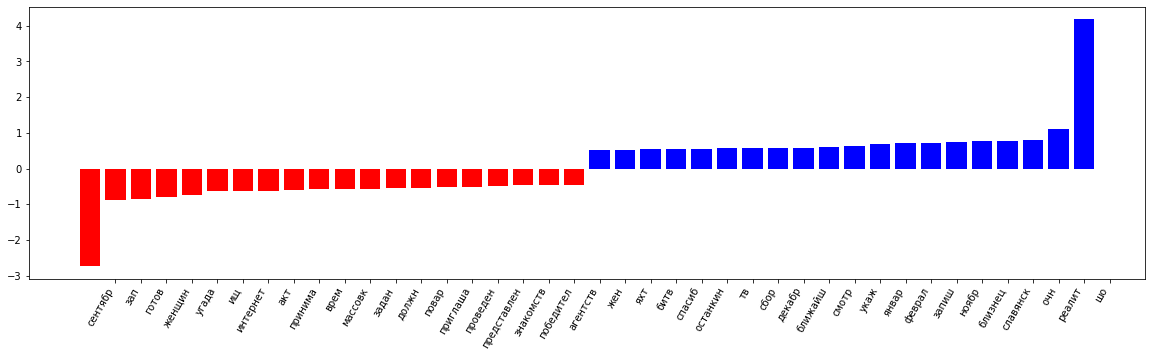

In [78]:
n_top_features = 20
# get coefficients with large absolute values 
coef = logit.coef_.ravel()
positive_coefficients = np.argsort(coef)[-n_top_features:]
negative_coefficients = np.argsort(coef)[:n_top_features]
interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])

# plot them
plt.figure(figsize=(20, 5))
colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [14]:
# порождаем данные
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

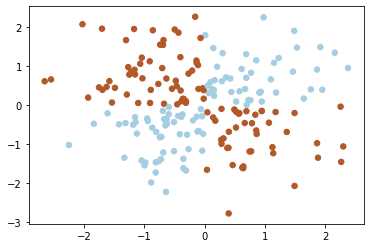

In [15]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

In [16]:
n_top_features = 40
coef = logit.coef_.ravel() #Функция ravel() возвращает сжатый до одной оси массив.
coefficients = np.argsort(coef)
coefficients = coefficients[-n_top_features:]
coefficients = coefficients[::-1]
feature_names[interesting_coefficients]

index = 0
print("Слова и коэффициенты с большими абсолютными значениями:")
for c in coefficients:
    index = index + 1
    name = feature_names[c]
    print(str(index) + " - " + name + " (" + str(c) + ")")



Слова и коэффициенты с большими абсолютными значениями:
1 - шо (11852)
2 - реалит (8817)
3 - очн (6679)
4 - славянск (9573)
5 - близнец (694)
6 - ноябр (5971)
7 - запиш (3059)
8 - феврал (11191)
9 - январ (12140)
10 - укаж (10915)
11 - смотр (9661)
12 - ближайш (687)
13 - декабр (2243)
14 - сбор (9239)
15 - тв (10409)
16 - останкин (6461)
17 - спасиб (9900)
18 - битв (660)
19 - яхт (12166)
20 - жен (2769)
21 - зрител (3282)
22 - игр (3308)
23 - дне (2434)
24 - хл (11455)
25 - постро (7703)
26 - ап (287)
27 - готовн (2028)
28 - вотс (1499)
29 - благотворительн (672)
30 - окончан (6273)
31 - проживан (8269)
32 - пром (8321)
33 - зв (3172)
34 - семейн (9363)
35 - ид (3318)
36 - талантлив (10362)
37 - документ (2501)
38 - хэклер (11545)
39 - федеральн (11194)
40 - помож (7541)


### Првоерка модели на данных 

In [20]:
texts = [
    "asfsadasdfsd sd gsdg sdg sdgsdg sdg", 
    "тв шоу для актеров",
    "москва / съемка для тв / съемка: 05.06 кулинарное шоу требуются: внимание настоящие, не актеры, которые просто сыграют, а именно настоящие ( но не стесняющиеся камеры, общительные, яркие ) - веганы - девушки соблюдающие правильное питание - аллергики ( с какой то распространенной аллергией, например орехи) задачи: дегустация блюд / комментарии по вкусовым впечатлениям",
]
result_x = train_x = pd.DataFrame(data=vectorizer.transform(texts).toarray(), columns=feature_names)
result = logit.predict_proba(result_x)
print("Вероятность - текст")
for i in range(0, len(texts)):
    print(str(result[i][1]) + " : " + texts[i])

Вероятность - текст
0.01743941327122247 : asfsadasdfsd sd gsdg sdg sdgsdg sdg
0.030472457100055597 : тв шоу для актеров
0.0276589513495145 : москва / съемка для тв / съемка: 05.06 кулинарное шоу требуются: внимание настоящие, не актеры, которые просто сыграют, а именно настоящие ( но не стесняющиеся камеры, общительные, яркие ) - веганы - девушки соблюдающие правильное питание - аллергики ( с какой то распространенной аллергией, например орехи) задачи: дегустация блюд / комментарии по вкусовым впечатлениям
